# Interpreting Large Language Models with Soft Entropy

There are major questions about multi-linguality from both a cognitive perspective and a typological perspective. An advantage of working with large language models is that they allow you to look at what happens inside the model on a representational level as it processes a sentence. We've prepared a number of datasets and models for you to look at, all listed in the resources.ipynb notebook


In [1]:
#We import a class for analysing BERT models and an entropy estimator
from h import BERTAnalyser, Estimator
import pandas as pd

In [2]:
languages = ['french', 'german', 'finnish', 'romanian', 'danish', 'spanish']

In [7]:
save_path = 'results' #path where JSON file with results should be written
model_id = 'google-bert/bert-base-cased' #hugging face model id
task_repo, subtask_name = 'hcoxec/french_german_mix', None #hugging face model repo and substask names
n_batches, batch_size = 10, 256 #how many batches of data to analyse, and sentences per batch
device = 'cpu' #torch device to load model into usually cpu or cuda:0
cache_dir = 'model_cache' #path to directory where model files should be saved

In [8]:
#these additional logs will also be written to the results file, to help
#keep track of variables later
additional_logs = {
    "model" : 'm_bert',
    "n_examples" : n_batches*batch_size,
}

In [9]:
h_estimator = Estimator() #instantiates and Entropy estimator
analyser = BERTAnalyser( #intantiants an analyser and loads the bert model into memory
    device=device,
    h_estimator=h_estimator, 
    model_id=model_id, 
    results_file_name=save_path,
    cache_dir=cache_dir
)
analyser.get_dataset(task_repo, subtask_name) #downloads the dataset
train_loader = analyser.get_dataloader(bs=batch_size) #packages the dataset into batches


In [11]:
h_estimator.reset() #clears the probability table from the estimator to start a new analysis
results_dict, results_df  = analyser.online_estimation( #runs online entropy estimation for the number of batches specified
    train_loader, 
    max_batches=n_batches, 
    additional_logs= additional_logs,
    label_types=['language', 'token','bigram','trigram']

)
results_df

Encoding | hcoxec/french_german_mix:   0%|          | 0/10 [00:00<?, ?it/s]

,variation,residual,disentanglement,regularity,label
overall,0.786361,0.251755,0.000000,0.000000,overall
language,0.744902,0.052723,0.204796,0.041459,language
token,0.329770,0.527916,0.485366,0.456592,token
bigram,0.225682,0.132366,0.240103,0.560679,bigram
trigram,0.197970,0.035241,0.248189,0.588391,trigram


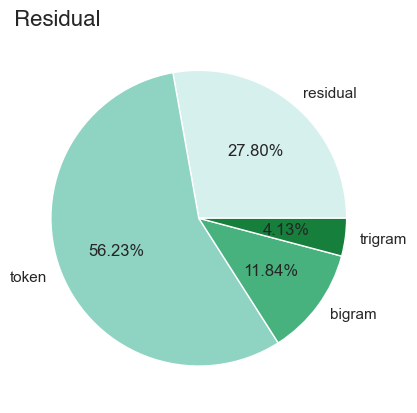

In [15]:
analyser.plot_residual(results_df) #builds a pie chart of the residual

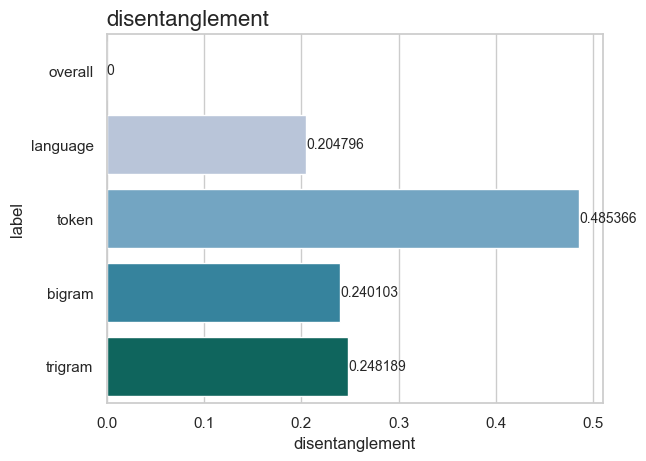

In [14]:
analyser.plot(results_df, measure='disentanglement') #generates a bar plot of any measure

In [ ]:
#loads all saved results into a dataframe for analysis
df = pd.read_json('results.json', lines=True)
